In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Bidirectional, Embedding, GRU, Dense, LSTM, SimpleRNN
from sklearn.metrics import classification_report, confusion_matrix

Встановлюємо гіперпараметри:

In [2]:
max_features = 10000
maxlen = 500
batch_size = 128

Завантаження даних:

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

Підготовка даних:

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

Побудова простої __RNN__ моделі:

In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Компіляція та навчання моделі:

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 21s 147ms/step - loss: 0.6270 - acc: 0.6329 - val_loss: 0.5301 - val_acc: 0.7340
Epoch 2/5
137/137 [==============================] - 20s 147ms/step - loss: 0.4109 - acc: 0.8253 - val_loss: 0.3941 - val_acc: 0.8332
Epoch 3/5
137/137 [==============================] - 20s 148ms/step - loss: 0.2903 - acc: 0.8842 - val_loss: 0.3493 - val_acc: 0.8539
Epoch 4/5
137/137 [==============================] - 20s 148ms/step - loss: 0.2245 - acc: 0.9154 - val_loss: 0.3409 - val_acc: 0.8691
Epoch 5/5
137/137 [==============================] - 20s 147ms/step - loss: 0.1780 - acc: 0.9338 - val_loss: 0.3670 - val_acc: 0.8499


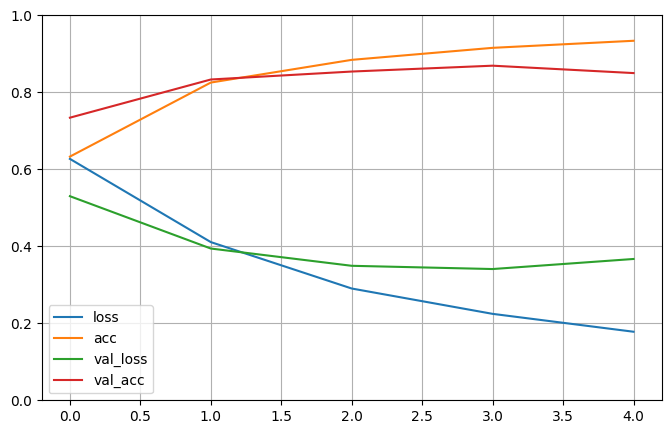

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Прогнозування та оцінка роботи моделі:

782/782 [==============================] - 21s 27ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
Predicted label: 0, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 23s 29ms/step - loss: 0.3718 - acc: 0.8482
Test loss: 0.3718
Test accuracy: 0.8482


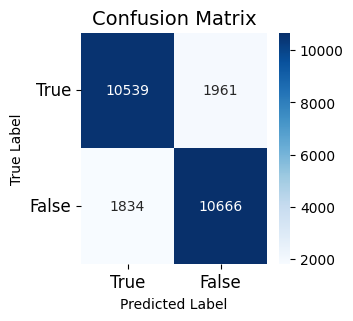

True Positive: 10539
True Negative: 10666
False Positive: 1961
False Negative: 1834
              precision    recall  f1-score   support

           0       0.85      0.84      0.85     12500
           1       0.84      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [8]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(input_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(y_test, binary_predictions)
df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

report = classification_report(y_test, binary_predictions)
print(report)

Побудова моделі __LSTM__:

In [9]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Компіляція та навчання моделі:

Epoch 1/5
137/137 [==============================] - 51s 360ms/step - loss: 0.6182 - acc: 0.6496 - val_loss: 0.4923 - val_acc: 0.8012
Epoch 2/5
137/137 [==============================] - 49s 355ms/step - loss: 0.3829 - acc: 0.8394 - val_loss: 0.4224 - val_acc: 0.8371
Epoch 3/5
137/137 [==============================] - 49s 355ms/step - loss: 0.2892 - acc: 0.8920 - val_loss: 0.2984 - val_acc: 0.8769
Epoch 4/5
137/137 [==============================] - 49s 355ms/step - loss: 0.2395 - acc: 0.9108 - val_loss: 0.2902 - val_acc: 0.8820
Epoch 5/5
137/137 [==============================] - 49s 358ms/step - loss: 0.2104 - acc: 0.9247 - val_loss: 0.2942 - val_acc: 0.8833


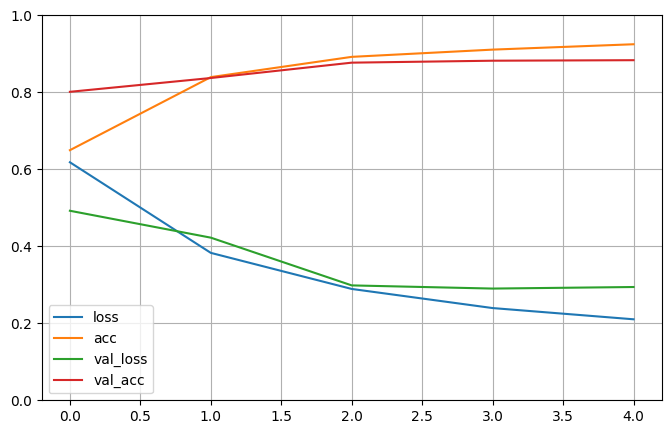

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Прогнозування та оцінка роботи моделі:

782/782 [==============================] - 53s 67ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 53s 67ms/step - loss: 0.3078 - acc: 0.8775
Test loss: 0.3078
Test accuracy: 0.8775


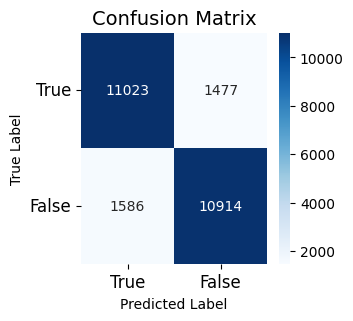

True Positive: 11023
True Negative: 10914
False Positive: 1477
False Negative: 1586
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     12500
           1       0.88      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [11]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(input_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(y_test, binary_predictions)
df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

report = classification_report(y_test, binary_predictions)
print(report)

Побудова моделі __Bidirectional RNN__:

In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Компіляція та навчання моделі:

Epoch 1/5
137/137 [==============================] - 116s 804ms/step - loss: 0.6401 - acc: 0.6230 - val_loss: 0.5825 - val_acc: 0.6847
Epoch 2/5
137/137 [==============================] - 109s 797ms/step - loss: 0.4225 - acc: 0.8248 - val_loss: 0.3414 - val_acc: 0.8601
Epoch 3/5
137/137 [==============================] - 108s 786ms/step - loss: 0.3067 - acc: 0.8805 - val_loss: 0.4421 - val_acc: 0.8403
Epoch 4/5
137/137 [==============================] - 106s 778ms/step - loss: 0.2704 - acc: 0.9017 - val_loss: 0.3029 - val_acc: 0.8747
Epoch 5/5
137/137 [==============================] - 107s 784ms/step - loss: 0.2166 - acc: 0.9208 - val_loss: 0.2969 - val_acc: 0.8844


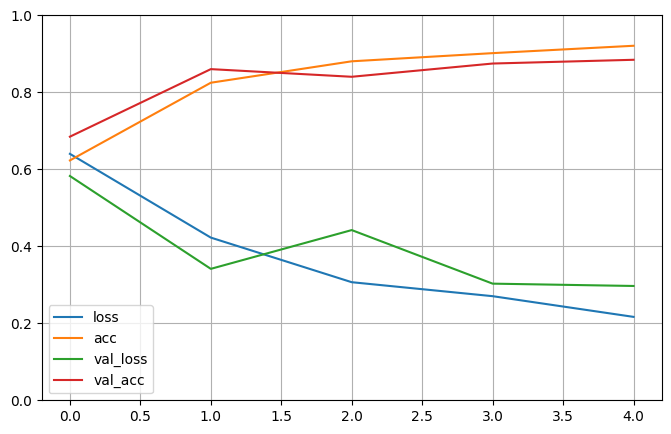

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Прогнозування та оцінка роботи моделі:

782/782 [==============================] - 64s 80ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 63s 80ms/step - loss: 0.3106 - acc: 0.8788
Test loss: 0.3106
Test accuracy: 0.8788


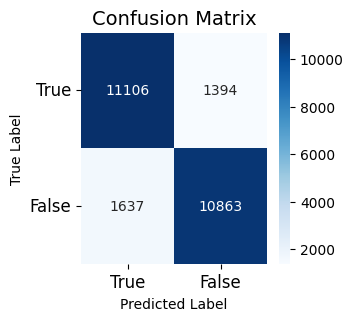

True Positive: 11106
True Negative: 10863
False Positive: 1394
False Negative: 1637
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12500
           1       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [7]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(input_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(y_test, binary_predictions)
df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

report = classification_report(y_test, binary_predictions)
print(report)

Побудова моделі __Deep RNN__:

In [15]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Компіляція та навчання моделі:

Epoch 1/5
137/137 [==============================] - 105s 741ms/step - loss: 0.6191 - acc: 0.6289 - val_loss: 0.4523 - val_acc: 0.7971
Epoch 2/5
137/137 [==============================] - 89s 652ms/step - loss: 0.3654 - acc: 0.8426 - val_loss: 0.3356 - val_acc: 0.8631
Epoch 3/5
137/137 [==============================] - 98s 715ms/step - loss: 0.2740 - acc: 0.8951 - val_loss: 0.2924 - val_acc: 0.8785
Epoch 4/5
137/137 [==============================] - 101s 742ms/step - loss: 0.2317 - acc: 0.9122 - val_loss: 0.3119 - val_acc: 0.8801
Epoch 5/5
137/137 [==============================] - 95s 691ms/step - loss: 0.1951 - acc: 0.9281 - val_loss: 0.3078 - val_acc: 0.8759


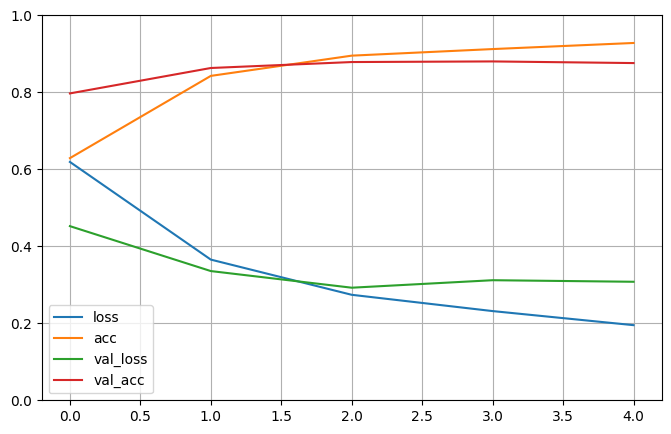

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Прогнозування та оцінка роботи моделі:

782/782 [==============================] - 93s 118ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 104s 133ms/step - loss: 0.3264 - acc: 0.8697
Test loss: 0.3264
Test accuracy: 0.8697


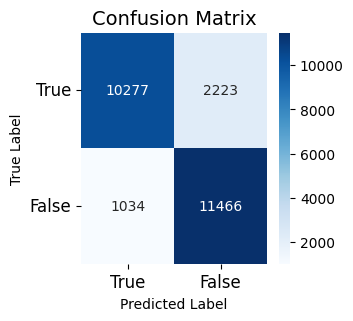

True Positive: 10277
True Negative: 11466
False Positive: 2223
False Negative: 1034
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     12500
           1       0.84      0.92      0.88     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [17]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(input_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(y_test, binary_predictions)
df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

report = classification_report(y_test, binary_predictions)
print(report)

В даному домашньому завданні ми вирішували задачу бінарної класифікації відгуків з датасету __imdb__ на позитивні (1) та негативні (0) за допомогою рекурентної нейронної мережі. Для цього ми використали звичайну __Simple RNN__, __LSTM__, двонаправлену __BRNN__ та глибоку __DRNN__ нейромережу. Найвищу точність показали моделі, які містять у своєму складі LSTM шари.